<a href="https://colab.research.google.com/github/omanshuthapliyal/ML2Coursework/blob/master/Thapliyal_Omanshu_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Name: Omanshu Thapliyal
#ECE 595 Machine Learning II
#Project 2: Autoencoders - Student Code

In [0]:
#Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

#Part 0: Importing and Normalizing Data

In [0]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

In [0]:
#Reshape training and testing data into 784-dimensional vectors
try:
  d = data_train.shape[1]
  data_train = data_train.reshape((data_train.shape[0], 
                                  d*d))
  data_test = data_test.reshape((data_test.shape[0], 
                               d*d))
except:
  print("training data shape: ", data_train.shape)
  print("testing data shape: ", data_test.shape)
  print("Data was reshaped already")

In [0]:
#Create autoencoder architecture
def deep_ae():
    model = Sequential()

    # Input layer: 784 perceptrons (reshape each image so that it is a flattened 784-dimensional vector)
    # First hidden layer: 400 perceptrons
    model.add(Dense(
      400, use_bias = True, kernel_initializer = "uniform",
      input_dim = 784
    ))
    # Second hidden layer: 200 perceptrons
    model.add(Dense(
        200, kernel_initializer = "uniform"
    ))
    # Third hidden layer (“bottleneck” layer): 100 perceptrons
    # THIS IS THE BOTTLENECK LAYER
    model.add(Dense(
        100, activation = "linear",
        kernel_initializer = "uniform"
    ))
    # Fourth hidden layer: 200 perceptrons
    model.add(Dense(
        200, kernel_initializer = "uniform"
    ))
    # Fifth hidden layer: 400 perceptrons
    model.add(Dense(
        400, kernel_initializer = "uniform"
    ))
    # Output layer (reconstruction): 784 perceptrons
    model.add(Dense(
        784, activation = "sigmoid",
        kernel_initializer = "uniform"
    ))
    return model

#Create deep autoencoder graph
deep_ae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss = "mean_squared_error",
                   optimizer = "adam" )
#Training parameters
num_epochs = 100
batch_size = 1024

#Train the model and assign training meta-data to a variable
deep_ae_model_history = deep_ae.fit(data_train, data_train,
                                    validation_data = (data_train,data_train),
                                    epochs = num_epochs,
                                    batch_size = batch_size,
                                    shuffle = True)

W1008 19:12:59.209671 140135529027456 module_wrapper.py:137] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1008 19:12:59.289254 140135529027456 module_wrapper.py:137] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Train on 60000 samples, validate on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 10s 174us/step - loss: 0.0934 - val_loss: 0.0687
Epoch 2/100
60000/60000 [==============================] - 10s 162us/step - loss: 0.0652 - val_loss: 0.0617
Epoch 3/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.0540 - val_loss: 0.0468
Epoch 4/100
60000/60000 [==============================] - 9s 158us/step - loss: 0.0446 - val_loss: 0.0424
Epoch 5/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.0406 - val_loss: 0.0377
Epoch 6/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.0350 - val_loss: 0.0333
Epoch 7/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.0323 - val_loss: 0.0301
Epoch 8/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.0292 - val_loss: 0.0283
Epoch 9/100
60000/60000 [==============================] - 10s 159us/step - loss: 0.027

In [0]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions = deep_ae.predict(data_test)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) #The third hidden layer is indexed at 2
deep_ae_hl = get_hl([data_test])[0]

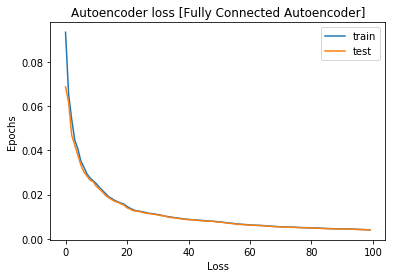

In [0]:
#Plot loss vs epoch
plt.plot(deep_ae_model_history.history['loss'])
plt.plot(deep_ae_model_history.history['val_loss'])
plt.title('Autoencoder loss [Fully Connected Autoencoder]')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

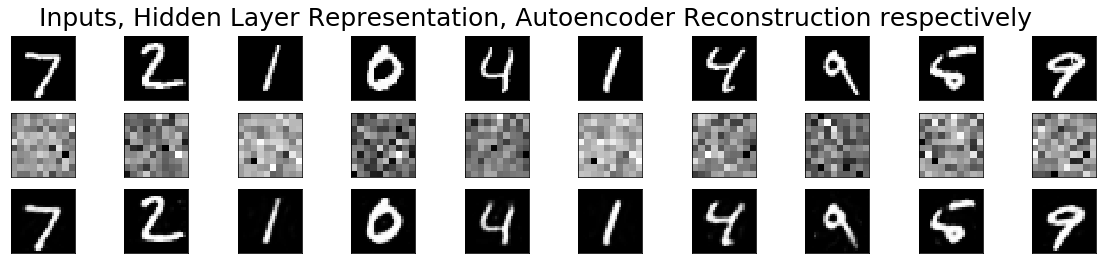

In [0]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
n_samples = 10
fig = plt.figure(figsize = (20, 4))
fig.suptitle('Inputs, Hidden Layer Representation, Autoencoder Reconstruction respectively', fontsize=25)
for i in range(n_samples):
  #Test Images
  ax = plt.subplot(3, n_samples, i+1)
  plt.imshow(data_test[i].reshape( (28,28) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #Hidden Layer Representation
  ax = plt.subplot(3, n_samples, i+1+n_samples)
  plt.imshow(deep_ae_hl[i].reshape( (10,10) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #Autoencoder Reconstruction
  ax = plt.subplot(3, n_samples, i+1+2*n_samples)
  plt.imshow(reconstructions[i].reshape( (28,28) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

#Part 2: Deep Convolutional AutoEncoder

In [0]:
#Reshape data into 2-D signals and account for grayscale channel in each image
(data_train, _), (data_test, _) = mnist.load_data()
# Normalizing to [0,1] for grayscale image
data_train = data_train/255.0
data_test = data_test/255.0
try:
  d = 28
  data_train = data_train.reshape((data_train.shape[0], 
                                  d, d, 1))
  data_test = data_test.reshape((data_test.shape[0], 
                               d, d, 1))
  print("training data shape: ", data_train.shape)
  print("testing data shape: ", data_test.shape)
except:
  print("Data was reshaped already")

('training data shape: ', (60000, 28, 28, 1))
('testing data shape: ', (10000, 28, 28, 1))


In [0]:
#Create Convolutional AutoEncoder Architecture
def cae():

    model = Sequential()
    
    #ENCODER

    # Input layer that accepts a 28x28 grayscale image
    # First hidden layer: A convolutional layer with 16 feature maps and a 3x3 filter size
    model.add(Conv2D(
        16, (3,3), padding = "same", 
        input_shape = (28,28,1),
        activation = "linear"
    ))
    # Second hidden layer: A 2x2 maxpooling layer
    model.add(MaxPooling2D(
        pool_size = (2,2), padding = "same"
    ))
    # Third hidden layer: A convolutional layer with 8 feature maps and a 3x3 filter size
    model.add(Conv2D(
        8, (3,3), padding = "same",
        activation = "linear"
        ))
    # Fourth hidden layer ("bottleneck" layer): A 2x2 maxpooling layer
    # THIS IS THE BOTTLENECK LAYER
    model.add(MaxPooling2D(
        pool_size = (2,2), padding = "same"
    ))

    #DECODER
    # Fifth hidden layer: A convolutional layer with 8 feature maps and a 3x3 filter size
    model.add(Conv2D(
        8, (3,3), padding = "same",
        activation = "linear"
        ))
    # Sixth hidden layer: A 2x2 upsampling layer
    model.add(UpSampling2D((2,2)) )
    # Seventh hidden layer: A convolutional layer with 16 feature maps and a 3x3 filter size
    model.add(Conv2D(
        16, (3,3), padding = "same",
        activation = "linear"
        ))
    # Eighth hidden layer: A 2x2 upsampling layer
    model.add(UpSampling2D((2,2)) )
    # Output layer (reconstruction): A convolutional layer with a single feature map and a 3x3 filter size
    model.add(Conv2D(
        1, (3,3), activation = "sigmoid", padding = "same"
    ))

    return model

#Create deep autoencoder graph
conv_ae = cae()
print(conv_ae.summary())

#Compile model using an appropriate loss and optimizer algorithm
conv_ae.compile(loss = "mean_squared_error", optimizer = "adam")

#Training parameters
num_epochs = 100
batch_size = 1024

#Train the model and assign training meta-data to a variable
conv_ae_model_history = conv_ae.fit(data_train, data_train,
                                    validation_data = (data_train, data_train),
                                    epochs = num_epochs,
                                    batch_size = batch_size,
                                    shuffle = True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 16)        1168      
__________

In [0]:
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
conv_reconstructions = conv_ae.predict(data_test)
print(data_test.shape)
#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output]) #The fourth hidden layer is indexed at 3
conv_ae_hl = get_hl([data_test])[0]

In [0]:
#Plot loss vs epoch
plt.plot(conv_ae_model_history.history['loss'])
plt.plot(conv_ae_model_history.history['val_loss'])
plt.title('Autoencoder loss [Convolutional Autoencoder]')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

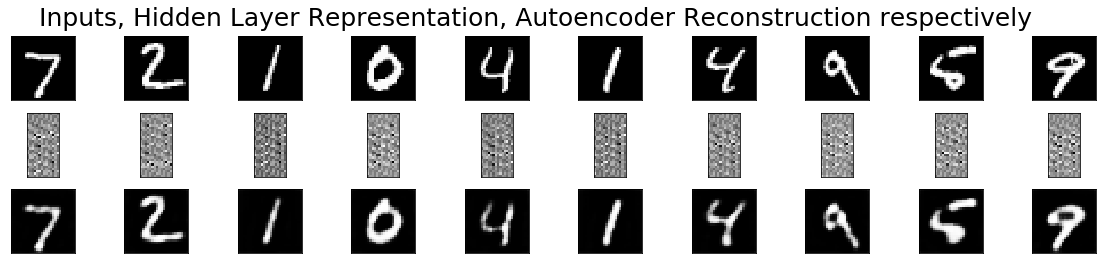

In [0]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
n_samples = 10
fig = plt.figure(figsize = (20, 4))
fig.suptitle('Inputs, Hidden Layer Representation, Autoencoder Reconstruction respectively', fontsize=25)
for i in range(n_samples):
  #Test Images
  ax = plt.subplot(3, n_samples, i+1)
  plt.imshow(data_test[i].reshape( (28,28) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #Hidden Layer Representation
  ax = plt.subplot(3, n_samples, i+1+n_samples)
  plt.imshow(conv_ae_hl[i].reshape( (28,14) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #Autoencoder Reconstruction
  ax = plt.subplot(3, n_samples, i+1+2*n_samples)
  plt.imshow(conv_reconstructions[i].reshape( (28,28) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

#Part 3: Denoising AutoEncoder

In [0]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
try:
  d = 28
  data_train_noisy = data_train_noisy.reshape((data_train_noisy.shape[0], 
                                  d, d, 1))
  data_test_noisy = data_test_noisy.reshape((data_test_noisy.shape[0], 
                               d, d, 1))
  print("training data shape: ", data_train_noisy.shape)
  print("testing data shape: ", data_test_noisy.shape)
except:
  print("Data was reshaped already")

('training data shape: ', (60000, 28, 28, 1))
('testing data shape: ', (10000, 28, 28, 1))


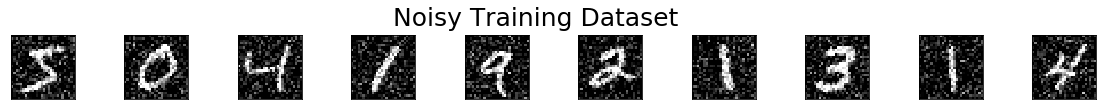

In [0]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
n_samples = 10
fig = plt.figure(figsize = (20, 4))
fig.suptitle('Noisy Training Dataset', fontsize=25)
for i in range(n_samples):
  #Test Images
  ax = plt.subplot(3, n_samples, i+1)
  plt.imshow(data_train_noisy[i].reshape( (28,28) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

In [0]:
#Create denoising autoencoder architecture
def dae():

    model = Sequential()
    
    #ENCODER

    # Input layer that accepts a 28x28 grayscale image
    # First hidden layer: A convolutional layer with 16 feature maps and a 3x3 filter size
    model.add(Conv2D(
        16, (3,3), padding = "same", 
        input_shape = (28,28,1)
    ))
    # Second hidden layer: A 2x2 maxpooling layer
    model.add(MaxPooling2D(
        pool_size = (2,2), padding = "same"
    ))
    # Third hidden layer: A convolutional layer with 8 feature maps and a 3x3 filter size
    model.add(Conv2D(
        8, (3,3), padding = "same"
        ))
    # Fourth hidden layer ("bottleneck" layer): A 2x2 maxpooling layer
    # THIS IS THE BOTTLENECK LAYER
    model.add(MaxPooling2D(
        pool_size = (2,2), padding = "same"
    ))

    #DECODER
    # Fifth hidden layer: A convolutional layer with 8 feature maps and a 3x3 filter size
    model.add(Conv2D(
        8, (3,3), padding = "same"
        ))
    # Sixth hidden layer: A 2x2 upsampling layer
    model.add(UpSampling2D((2,2)) )
    # Seventh hidden layer: A convolutional layer with 16 feature maps and a 3x3 filter size
    model.add(Conv2D(
        16, (3,3), padding = "same"
        ))
    # Eighth hidden layer: A 2x2 upsampling layer
    model.add(UpSampling2D((2,2)) )
    # Output layer (reconstruction): A convolutional layer with a single feature map and a 3x3 filter size
    model.add(Conv2D(
        1, (3,3), activation = "sigmoid", padding = "same"
    ))

    return model

#Create deep autoencoder graph
conv_dae = dae()
print(conv_dae.summary())

#Compile model using an appropriate loss and optimizer algorithm
conv_dae.compile(loss = "mean_squared_error", optimizer = "adam")

#Training parameters
num_epochs = 100
batch_size = 1024

#Train the model and assign training meta-data to a variable
conv_dae_model_history = conv_dae.fit(data_train_noisy, data_train_noisy,
                                    validation_data = (data_train_noisy, data_train_noisy),
                                    epochs = num_epochs,
                                    batch_size = batch_size,
                                    shuffle = True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        1168      
__________

In [0]:
#Generate denoised versions of noisy inputs

#Calculate the reconstructions of the testing set (output of autoencoder on test set)
convDN_reconstructions = conv_dae.predict(data_test_noisy)

#Obtain encoder representation of data
get_hl = K.function([conv_dae.layers[0].input], [conv_dae.layers[3].output]) #The fourth hidden layer is indexed at 3
conv_dae_hl = get_hl([data_test_noisy])[0]

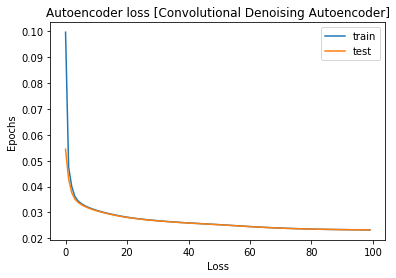

In [0]:
#Plot loss vs epoch
plt.plot(conv_dae_model_history.history['loss'])
plt.plot(conv_dae_model_history.history['val_loss'])
plt.title('Autoencoder loss [Convolutional Denoising Autoencoder]')
plt.xlabel('Loss')
plt.ylabel('Epochs')
plt.legend(['train', 'test'], loc = 'upper right')
plt.show()

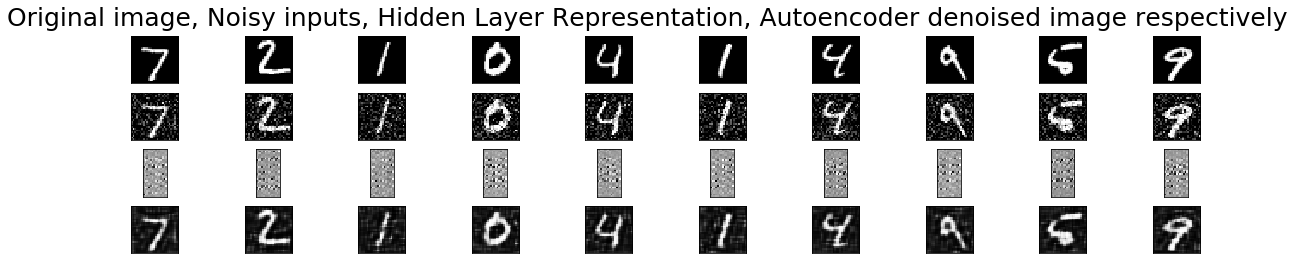

In [0]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set
n_samples = 10
fig = plt.figure(figsize = (20, 4))
fig.suptitle('Original image, Noisy inputs, Hidden Layer Representation, Autoencoder denoised image respectively', fontsize=25)
for i in range(n_samples):
  #Test Images
  ax = plt.subplot(4, n_samples, i+1)
  plt.imshow(data_test[i].reshape( (28,28) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #Noisy Test Images
  ax = plt.subplot(4, n_samples, i+1+n_samples)
  plt.imshow(data_test_noisy[i].reshape( (28,28) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #Hidden Layer Representation
  ax = plt.subplot(4, n_samples, i+1+2*n_samples)
  plt.imshow(conv_dae_hl[i].reshape( (28,14) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  #Autoencoder Reconstruction
  ax = plt.subplot(4, n_samples, i+1+3*n_samples)
  plt.imshow(convDN_reconstructions[i].reshape( (28,28) ))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)